In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
orders_df=pd.read_csv(r'C:\Users\sneha\Desktop\food_order_ver 2.csv',index_col=['Order_ID'])

In [5]:
orders_df.head()

,Customer_ID,Restaurant_ID,Order_Date,Order_Time,Delivery_Time,TimeforDelivery,Order_Value,Delivery_Fee,Payment_Method,Discounts_and_Offers,Commission_Fee,Payment_Processing_Fee,Refunds,Discount_Type,Discount_Amount,Commission_Percentage,Cost,Revenue,Profit,Profit_Margin
Order_ID,,,,,,,,,,,,,,,,,,,,
1,C8270,R2924,01-02-2024,01:11:00,02:39:00,88,1914,0,Credit Card,0.05,150,47,0,ON APP,96,0.078370,143,150,7,0.046667
2,C1860,R2054,02-02-2024,22:11:00,22:46:00,35,986,40,Digital Wallet,0.10,198,23,0,BASIC,99,0.200811,162,198,36,0.181818
3,C6390,R2870,31-01-2024,05:54:00,06:52:00,58,937,30,Cash on Delivery,0.15,195,45,0,NEW USER,141,0.208111,216,195,-21,-0.107692
4,C6191,R2642,16-01-2024,22:52:00,23:38:00,46,1463,50,Cash on Delivery,0.00,146,27,0,NONE,0,0.099795,77,146,69,0.472603
5,C6734,R2799,29-01-2024,01:19:00,02:48:00,89,1992,30,Cash on Delivery,50.00,130,50,0,PROMO,50,0.065261,130,130,0,0.000000


In [6]:
orders_df.describe()

,TimeforDelivery,Order_Value,Delivery_Fee,Discounts_and_Offers,Commission_Fee,Payment_Processing_Fee,Refunds,Discount_Amount,Commission_Percentage,Cost,Revenue,Profit,Profit_Margin
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,73.575000,1053.969000,28.620000,10.112150,126.99000,29.832000,28.300000,74.333000,0.197509,161.085000,126.99000,-34.095000,-0.472607
std,26.015133,530.975339,16.958278,20.016301,43.06405,11.627165,49.614228,68.707866,0.226562,85.760472,43.06405,97.661906,1.080963
min,30.000000,104.000000,0.000000,0.000000,50.00000,10.000000,0.000000,0.000000,0.026065,16.000000,50.00000,-389.000000,-7.480770
25%,50.000000,597.750000,20.000000,0.050000,90.00000,20.000000,0.000000,27.000000,0.077625,95.000000,90.00000,-93.000000,-0.879410
50%,74.000000,1038.500000,30.000000,0.100000,127.00000,30.000000,0.000000,50.000000,0.120247,141.000000,127.00000,-21.000000,-0.163888
75%,96.000000,1494.000000,40.000000,0.150000,164.00000,40.000000,50.000000,101.000000,0.207108,215.250000,164.00000,37.250000,0.263514
max,119.000000,1995.000000,50.000000,50.000000,200.00000,50.000000,150.000000,299.000000,1.690910,473.000000,200.00000,176.000000,0.916667


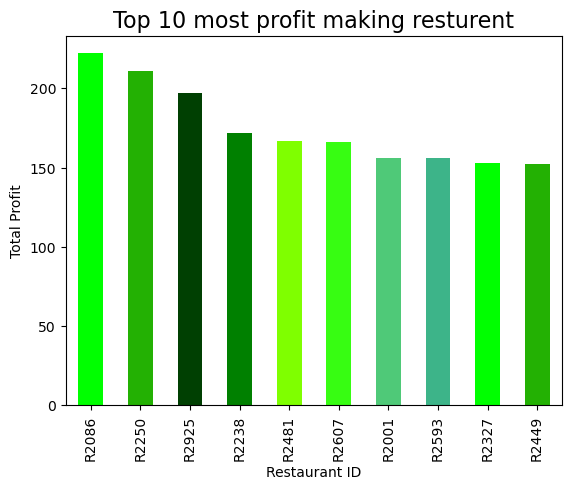

In [7]:
ax3 = orders_df.groupby('Restaurant_ID')['Profit'].sum().nlargest(10).plot(kind='bar',color=('#00FF00','#23B103','#004002','#008000','#7FFF00','#37FD12','#4FC978','#3DB489'))
plt.title('Top 10 most profit making resturent',fontsize = 16)
plt.xlabel('Restaurant ID')
plt.ylabel('Total Profit')
plt.show()

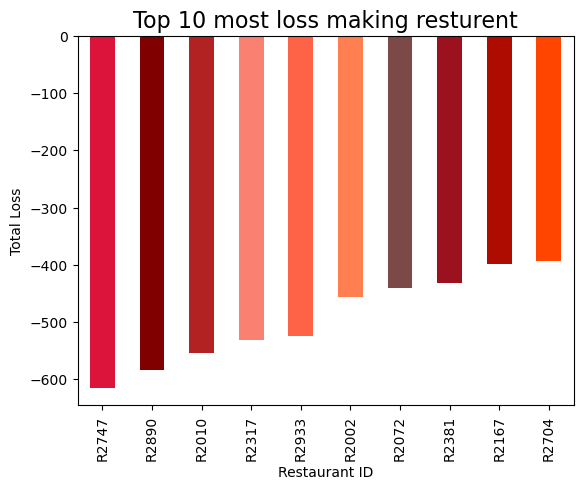

In [8]:
ax3 = orders_df.groupby('Restaurant_ID')['Profit'].sum().nsmallest(10).plot(kind='bar',color=('#dc143c','#800000','#b22222','#fa8072','#ff6347','#ff7f50','#7c4848','#9b111e','#ae0c00','#ff4500'))
plt.title('Top 10 most loss making resturent',fontsize = 16)
plt.xlabel('Restaurant ID')
plt.ylabel('Total Loss')
plt.show()

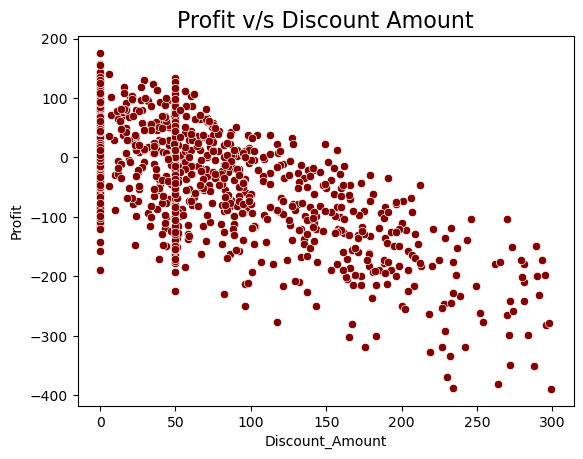

In [9]:
sns.scatterplot(x='Discount_Amount',y='Profit',data=orders_df,color='#800000')
plt.title('Profit v/s Discount Amount',fontsize = 16)
plt.show()

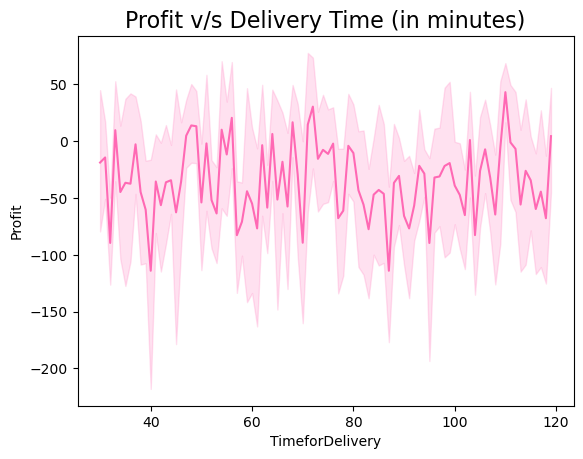

In [56]:
sns.lineplot(x='TimeforDelivery',y='Profit',data=orders_df,color='hotpink')
plt.title('Profit v/s Delivery Time (in minutes)',fontsize = 16)
plt.show()

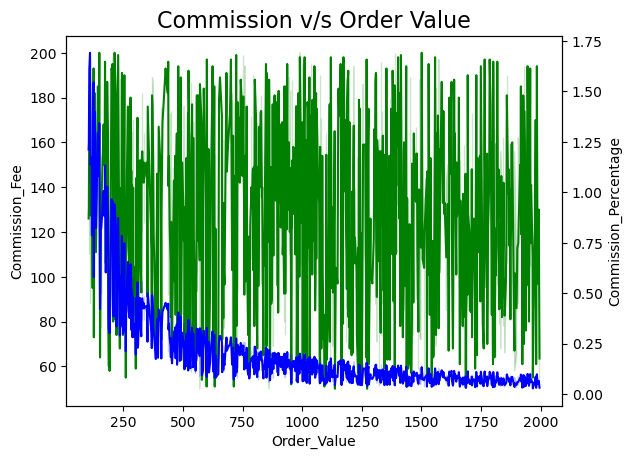

In [10]:
p=sns.lineplot(x='Order_Value',y='Commission_Fee',data=orders_df,color='green')
q=p.twinx()
q=sns.lineplot(x='Order_Value',y='Commission_Percentage',data=orders_df,color='blue')
plt.title('Commission v/s Order Value',fontsize = 16)
plt.show()

In [11]:
print('Loss Incurred for Orders with Commission Percentage less than 10%: ',orders_df[orders_df['Commission_Percentage']<0.1]['Profit'].sum())
print('Loss Incurred for Orders with Commission Percentage less than 15%: ',orders_df[orders_df['Commission_Percentage']<0.15]['Profit'].sum())
print('Loss Incurred for Orders with Commission Percentage less than 20%: ',orders_df[orders_df['Commission_Percentage']<0.2]['Profit'].sum())

Loss Incurred for Orders with Commission Percentage less than 10%:  -35191
Loss Incurred for Orders with Commission Percentage less than 15%:  -40198
Loss Incurred for Orders with Commission Percentage less than 20%:  -40824


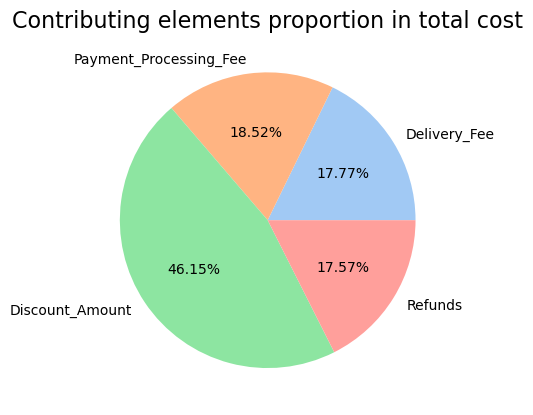

In [85]:
cost_elements = orders_df[['Delivery_Fee','Payment_Processing_Fee','Discount_Amount','Refunds']].sum()
plt.pie(x=cost_elements,labels=cost_elements.index,autopct='%0.2f%%',colors=sns.color_palette('pastel'))
plt.title('Contributing elements proportion in total cost',fontsize = 16)
plt.show()

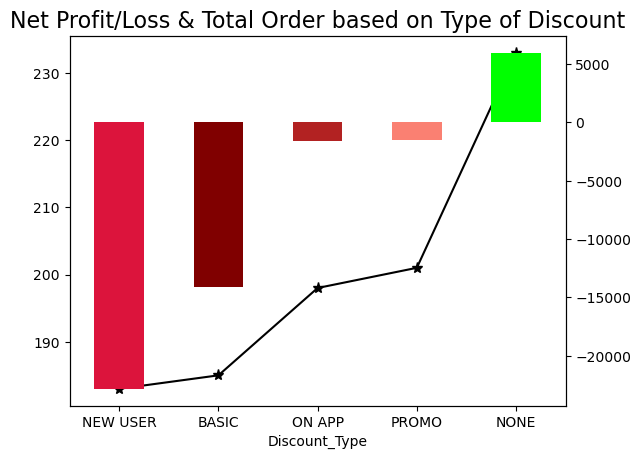

In [13]:
net_profit = orders_df.groupby('Discount_Type')['Profit'].sum().sort_values()
total_orders= orders_df.groupby('Discount_Type')['Customer_ID'].count().sort_values()
p=total_orders.plot(kind='line', color='black', marker='*', markersize=8, label='Total Orders')
q=p.twinx()
q=net_profit.plot(kind='bar', color=('#dc143c','#800000','#b22222','#fa8072','#00FF00'))
plt.title('Net Profit/Loss & Total Order based on Type of Discount',fontsize = 16)
plt.show()

In [30]:
norders= orders_df.groupby(by='Restaurant_ID').size().reset_index(name='No. of Orders')
norders.sort_values(by='No. of Orders',ascending=False)

,Restaurant_ID,No. of Orders
195,R2317,6
434,R2726,5
483,R2804,5
317,R2523,5
10,R2016,5
...,...,...
127,R2208,1
355,R2585,1
354,R2584,1
128,R2209,1


In [50]:
order_val= orders_df.groupby(by='Restaurant_ID')['Order_Value'].mean().reset_index()
order_val.sort_values(by='Order_Value',ascending=False).rename(columns={'Order_Value':'Average Order_Value (AOV)'})

,Restaurant_ID,Average Order_Value (AOV)
378,R2630,1995.0
354,R2584,1981.0
267,R2436,1976.0
272,R2447,1974.0
312,R2516,1960.0
...,...,...
210,R2339,147.0
438,R2732,143.0
197,R2319,129.0
379,R2631,118.0


In [47]:
returns_df=orders_df[orders_df['Refunds']>0]
numof=returns_df.groupby(by='Restaurant_ID')['Refunds'].count().reset_index()
amt=returns_df.groupby(by='Restaurant_ID')['Refunds'].mean().reset_index()
numof.sort_values(by='Refunds',ascending=False)
amt.sort_values(by='Refunds',ascending=False)
refunds=pd.merge(numof,amt,on='Restaurant_ID').rename(columns={'Refunds_x':'No. Of Refunds','Refunds_y':'Average Refund Amount'})
refunds.sort_values(by='No. Of Refunds',ascending=False)

,Restaurant_ID,No. Of Refunds,Average Refund Amount
9,R2028,4,62.500000
134,R2570,4,137.500000
41,R2129,3,66.666667
81,R2334,3,133.333333
222,R2917,2,75.000000
...,...,...,...
94,R2394,1,100.000000
96,R2411,1,100.000000
97,R2413,1,150.000000
98,R2425,1,50.000000


In [81]:
orders_made= orders_df.groupby(by='Customer_ID').size().reset_index(name='Orders Made')
repeat_customers=orders_made[orders_made['Orders Made']>1]
repeat_customers.sort_values(by='Orders Made',ascending=False)

,Customer_ID,Orders Made
726,C7938,3
730,C7949,3
2,C1009,2
530,C6232,2
561,C6486,2
576,C6588,2
577,C6592,2
590,C6732,2
620,C6977,2
642,C7190,2


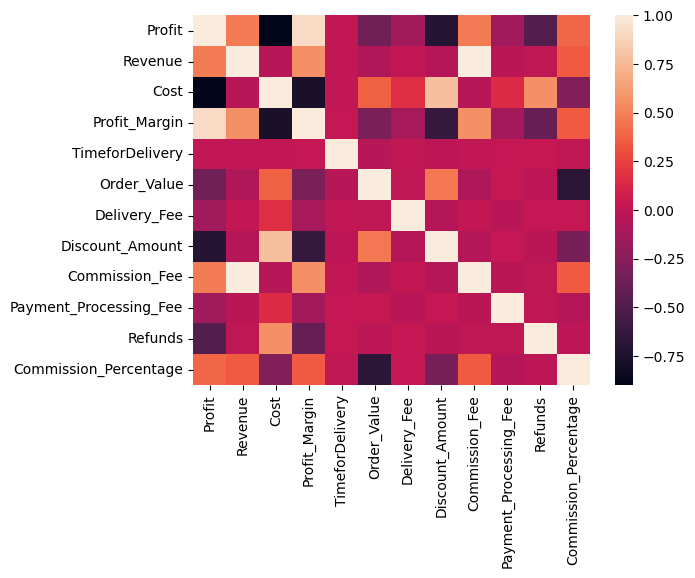

In [76]:
metricsdf=orders_df[['Profit','Revenue','Cost','Profit_Margin','TimeforDelivery',
                   'Order_Value','Delivery_Fee','Discount_Amount','Commission_Fee',
                   'Payment_Processing_Fee','Refunds','Commission_Percentage']]
matrix=metricsdf.corr()
sns.heatmap(matrix)
plt.show()